# Richards 2D
**Computational modelling of variably saturated floow in porous media with complex three-dimensional geometries**, McBride et al. 2006 (https://osf.io/u5pxc/)

In [127]:
# %%capture
# %run ???.py

#from netCDF4_classic import Dataset
from netCDF4 import Dataset


import os

## pandas
import pandas as pd

## numpy
import numpy as np

## plotting
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import matplotlib.collections
%matplotlib inline
import matplotlib.ticker as mtick
from matplotlib import rc
import matplotlib.tri as tri

## to convert unix time to human readable date
import time
import datetime


import scipy.interpolate as interp
#################
# Plot settings #
#################

# FIGURE SIZE
AxesWidth  = 15; #inch
AxesHeight = AxesWidth/1.618; # inch
plt.rc('figure', figsize=(AxesWidth,AxesHeight))

# AXES
plt.rc('axes', edgecolor='black',axisbelow=True, grid=True)

# GRID
plt.rc('grid', color='lightgray', linestyle='solid')

# TICKS
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
# FONTS
font = {'family' : 'sans-serif','weight' : 'normal','size'   : 30}
plt.rc('font', **font)
plt.rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{cmbright}')


In [3]:
os.chdir("C:/Users/Niccolo/eclipse-workspace/Richards2D/resources/input")
os.listdir()

['100x60.csv',
 '100x60_DN.csv',
 '100x60_NN.csv',
 '100x60_NN_1.csv',
 '10x6.csv',
 '10x60_DN.csv',
 '10x6_DN.csv',
 '10x6_NN.csv',
 '1terreni.msh',
 '2terreni.msh',
 '2terreni_impervious.msh',
 '50x60_DN.csv',
 'CartesianGrid.csv',
 'Casulli.csv',
 'Casulli50_30.csv',
 'CasulliBig.csv',
 'CasulliBig0.csv',
 'CasulliOK.csv',
 'CasulliOmogeneous.csv',
 'CasulliSmall.csv',
 'CasulliSmall0.csv',
 'Casulli_big.csv',
 'Casulli_small.csv',
 'column160.csv',
 'column480.csv',
 'column5000.csv',
 'csvfile.csv',
 'domain1.csv',
 'domain1_KMAX30.csv',
 'domain2_KMAX30.csv',
 'domain2_KMAX30_DN.csv',
 'domain2_KMAX60.csv',
 'prova.csv',
 'slope.msh',
 'square11.msh',
 'square11_bis.msh',
 'square22.msh',
 'square22_1.msh',
 'square22_1_simmetrico.msh',
 'square22_2.msh',
 'square22_bis.msh',
 'square_DD_0.msh',
 'square_DD_1.msh',
 'square_DD_1_bis.msh',
 'square_DN_1.msh',
 'square_ND_1.msh',
 'square_NN_1.msh',
 'square_NN_1_bis.msh',
 'square_with_subdomain.msh',
 'square_with_subdomain_100.m

In [4]:
my_cols = ["0", "1", "2", "3","4"]
df = pd.read_csv("100x60_NN_1.csv", names=my_cols, sep=',')
df = pd.read_csv("CasulliOK.csv", names=my_cols, sep=',')

# Nodes x coordinates
tmp = df['0'][1:1+int(df['0'][0])].values
x = np.insert(tmp,0,-999)

# Nodes y coordinates 
tmp = df['1'][1:1+int(df['0'][0])].values
y = np.insert(tmp,0,-999)


# Indeces of the nodes that make up a quadrangle. Note that nodes starts from 1 so it is necessary to add -999
# in x and y array at index 0
quad = df.loc[1+int(df['0'][0]):int(df['0'][0])+int(df['1'][0]),"0":"5"].values
quad = quad.astype(np.int64)


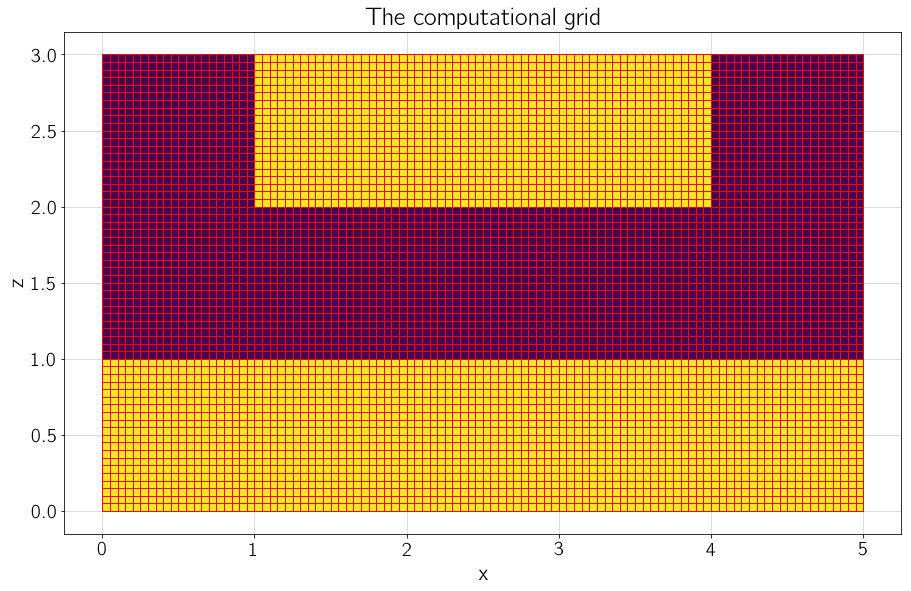

In [31]:
def showMeshPlot(nodes, elements, values):

    y = nodes[:,0]
    z = nodes[:,1]

    def quatplot(y,z, quatrangles, values, ax=None, **kwargs):

        if not ax: ax=plt.gca()
        yz = np.c_[y,z]
        verts= yz[quatrangles]
        pc = matplotlib.collections.PolyCollection(verts, **kwargs)
        pc.set_array(values)
        ax.add_collection(pc)
        ax.autoscale()
        return pc

    fig, ax = plt.subplots(figsize=(15,10))
    ax.set_aspect('equal')
    cmap = plt.cm.get_cmap('viridis', 2)
    pc = quatplot(y,z, np.asarray(elements), values, ax=ax, 
             edgecolor="red", cmap=cmap)
    #cb =fig.colorbar(pc, ax=ax,ticks=[0, 1])     
    #labels = np.arange(0,2,1)
    #loc    = labels
    #cb.set_ticks(loc)
    #cb.set_ticklabels(labels)
    plt.title('The computational grid', fontsize=25)
    plt.xlabel('x', fontsize=22)
    plt.ylabel('z', fontsize=22)
    

    plt.show()

#nodes = np.array([[0,0], [0,0.5],[0,1],[0.5,0], [0.5,0.5], [0.5,1], [1,0], 
#                  [1,0.5],[1,1]])
#elements = np.array([[0,3,4,1],[1,4,5,2],[3,6,7,4],[4,7,8,5]])
stresses = np.zeros(x.size)
nodes = np.column_stack((x,y))
elements = quad[:,0:4]


showMeshPlot(nodes, elements, quad[:,4])

Set in the output folder 

In [32]:
os.chdir("C:/Users/Niccolo/eclipse-workspace/Richards2D/resources")
os.listdir()

['.png',
 '1terreno',
 '2terreni',
 '2terreni.msh',
 'boundary_conditions',
 'Casulli.nc',
 'column.nc',
 'domain_slope',
 'input',
 'output',
 'output.nc',
 'output1.nc',
 'output_1terreni_small.nc',
 'output_2terreni.nc',
 'output_2terreni_small.nc',
 'output_cartesian.nc',
 'output_cartesianProva.nc',
 'output_Casulli.nc',
 'output_Casulli_10.nc',
 'output_Casulli_big.nc',
 'output_Casulli_big_v1.nc',
 'output_Casulli_new.nc',
 'output_Casulli_new1.nc',
 'output_Casulli_prova.nc',
 'output_Casulli_prova01.nc',
 'output_DD.nc',
 'output_DD_0.nc',
 'output_DD_1.nc',
 'output_DD_1_bis.nc',
 'output_DN_1.nc',
 'output_domain1.nc',
 'output_domain1_3600s.nc',
 'output_domain2.nc',
 'output_domain2_DN.nc',
 'output_flag0_DD.nc',
 'output_flag0_DD_bis.nc',
 'output_flag0_N.nc',
 'output_flag1_DD.nc',
 'output_flag1_DD_bis.nc',
 'output_flag2_DD.nc',
 'output_ND_1.nc',
 'output_NN_1.nc',
 'output_NN_1_bis.nc',
 'output_symmetric_DD.nc',
 'psi.txt',
 'square']

Define the `fileName` and the read the ouptut file

In [133]:
#fileName = 'output_Casulli_big.nc'
#fileName = 'output_1terreni_small.nc'
fileName = 'Casulli.nc'

## open netCDF file for reading.
ncfile = Dataset(fileName,'r') 
print ('*** SUCCESS reading')
  
print('\n ***FILE INFO:\n')
print(ncfile)

zz = ncfile.variables['z']
zDual = ncfile.variables['dual_z']
xx = ncfile.variables['x']
xDual = ncfile.variables['dual_x']
time = ncfile.variables['time']
ic = ncfile.variables['psiIC']
psi = ncfile.variables['psi']
theta = ncfile.variables['theta']
s = ncfile.variables['saturationDegree']
velocity = ncfile.variables['darcyVelocities']
u = ncfile.variables['darcyVelocitiesX']
v = ncfile.variables['darcyVelocitiesZ']

*** SUCCESS reading

 ***FILE INFO:

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Description_of_the_problem:  Prova 2D
    dimensions(sizes): z(6000), x(6000), xDual(12160), zDual(12160), time(25)
    variables(dimensions): float64 z(z), float64 x(x), float64 dual_x(xDual), float64 dual_z(zDual), int32 time(time), float64 psi(time,x), float64 psiIC(x), float64 theta(time,x), float64 saturationDegree(time,x), float64 darcyVelocities(time,xDual), float64 darcyVelocitiesX(time,xDual), float64 darcyVelocitiesZ(time,xDual)
    groups: 



Define the regular grid

### Initial condition, $\psi_0$

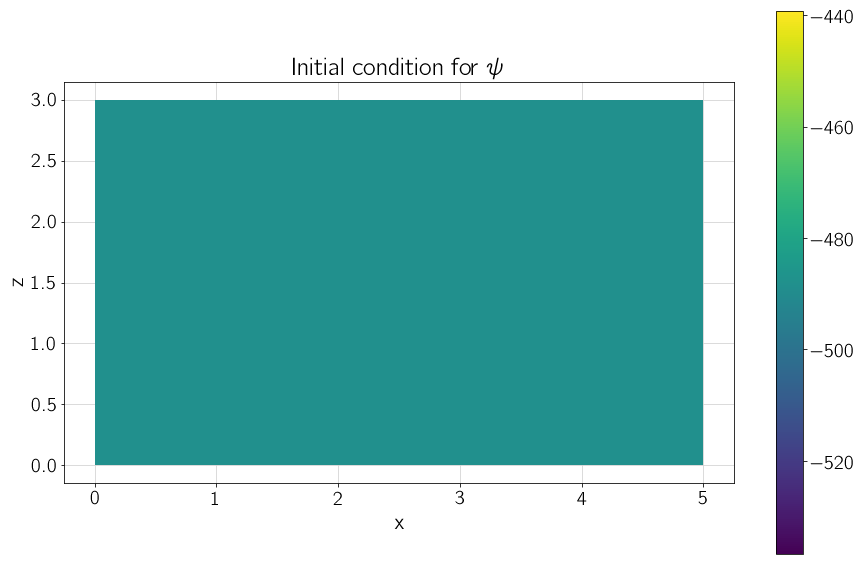

In [35]:
def showMeshPlot(nodes, elements, values):

    y = nodes[:,0]
    z = nodes[:,1]

    def quatplot(y,z, quatrangles, values, ax=None, **kwargs):

        if not ax: ax=plt.gca()
        yz = np.c_[y,z]
        verts= yz[quatrangles]
        pc = matplotlib.collections.PolyCollection(verts, **kwargs)
        pc.set_array(values)
        ax.add_collection(pc)
        ax.autoscale()
        return pc

    fig, ax = plt.subplots(figsize=(15,10))
    ax.set_aspect('equal')

    pc = quatplot(y,z, np.asarray(elements), values, ax=ax, 
             edgecolor="", cmap="viridis")
    fig.colorbar(pc, ax=ax)        
    plt.title('Initial condition for $\psi$', fontsize=25)
    plt.xlabel('x', fontsize=22)
    plt.ylabel('z', fontsize=22)
    

    plt.show()

nodes = np.column_stack((x,y))
elements = quad[:,0:4]


showMeshPlot(nodes, elements, ic[:]) #np.round(psi[50,:],5)

### Water suction

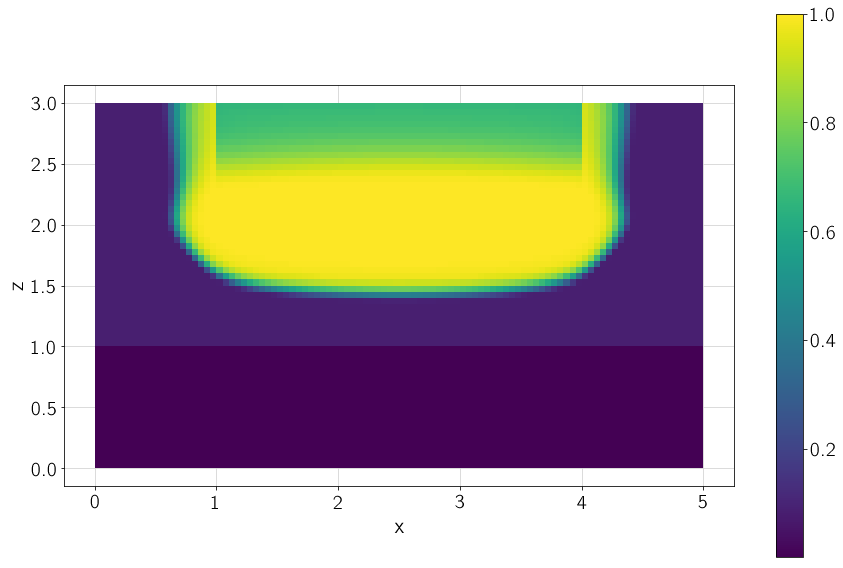

In [40]:
import matplotlib.pyplot as plt
import matplotlib.collections
import numpy as np
from pylab import *


def showMeshPlot(nodes, elements, values):

    y = nodes[:,0]
    z = nodes[:,1]

    def quatplot(y,z, quatrangles, values, ax=None, **kwargs):

        if not ax: ax=plt.gca()
        yz = np.c_[y,z]
        verts= yz[quatrangles]
        pc = matplotlib.collections.PolyCollection(verts, **kwargs)
        pc.set_array(values)
        ax.add_collection(pc)
        ax.autoscale()
        return pc

    fig, ax = plt.subplots(figsize=(15,10))
    ax.set_aspect('equal')
    #cmap = cm.get_cmap('viridis', 6)
    cmap = cm.get_cmap('viridis')
    pc = quatplot(y,z, np.asarray(elements), values, ax=ax, 
             edgecolor="", cmap=cmap)
    fig.colorbar(pc, ax=ax)    
    plt.title('', fontsize=25)
    plt.xlabel('x', fontsize=22)
    plt.ylabel('z', fontsize=22)
    

    plt.show()

nodes = np.column_stack((x,y))
elements = quad[:,0:4]

showMeshPlot(nodes, elements, s[24,:]) #np.round(psi[50,:],5)

Contour line 

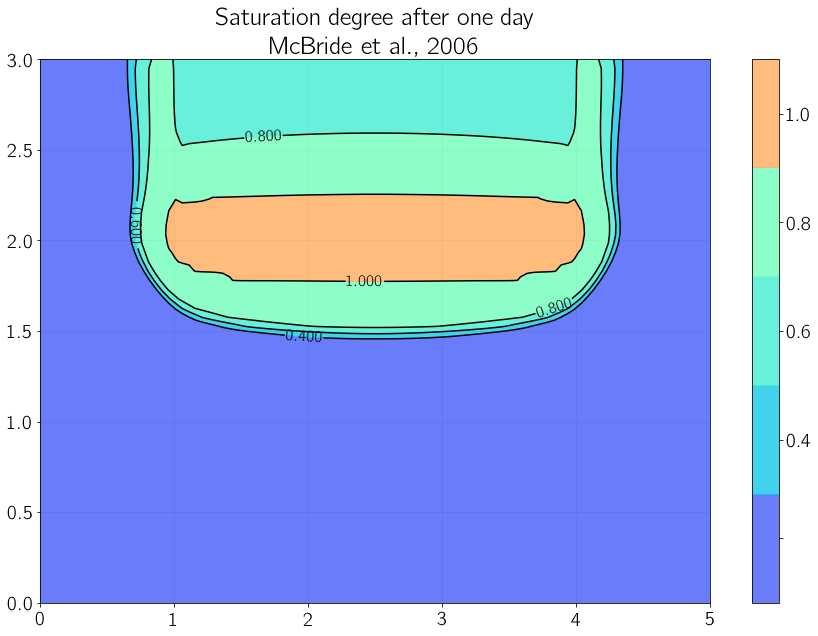

In [138]:

x_g = np.linspace(0,5,100)
y_g = np.linspace(0,3,60)
X_g, Y_g = np.meshgrid(x_g, y_g)
zfun_smooth_rbf = interp.Rbf(xx[:], zz[:], s[23,:], function='linear', smooth=0,epsilon=1)  # default smooth=0 for interpolation
z_dense_smooth_rbf = zfun_smooth_rbf(X_g, Y_g)  # not really a function, but a callable class instance

fig = plt.subplots(figsize=(15,10))
contours = plt.contour(x_g,y_g,z_dense_smooth_rbf, levels=[0.4,0.6,0.8,1.0], colors='black')
cmapp = plt.cm.get_cmap('rainbow')

plt.contourf(x_g,y_g,z_dense_smooth_rbf,cmap=cmapp, levels=[-0.1,0.4,0.6,0.8,1.0,2.0],alpha=.8)
plt.clabel(contours, inline=True, fontsize=16)
plt.title('Saturation degree after one day\n McBride et al., 2006',fontsize=25)
cbar = plt.colorbar()
cbar.set_ticks([0.2,0.5,0.7,0.9,1.5])
cbar.set_ticklabels([None,0.4,0.6,0.8,1.0])

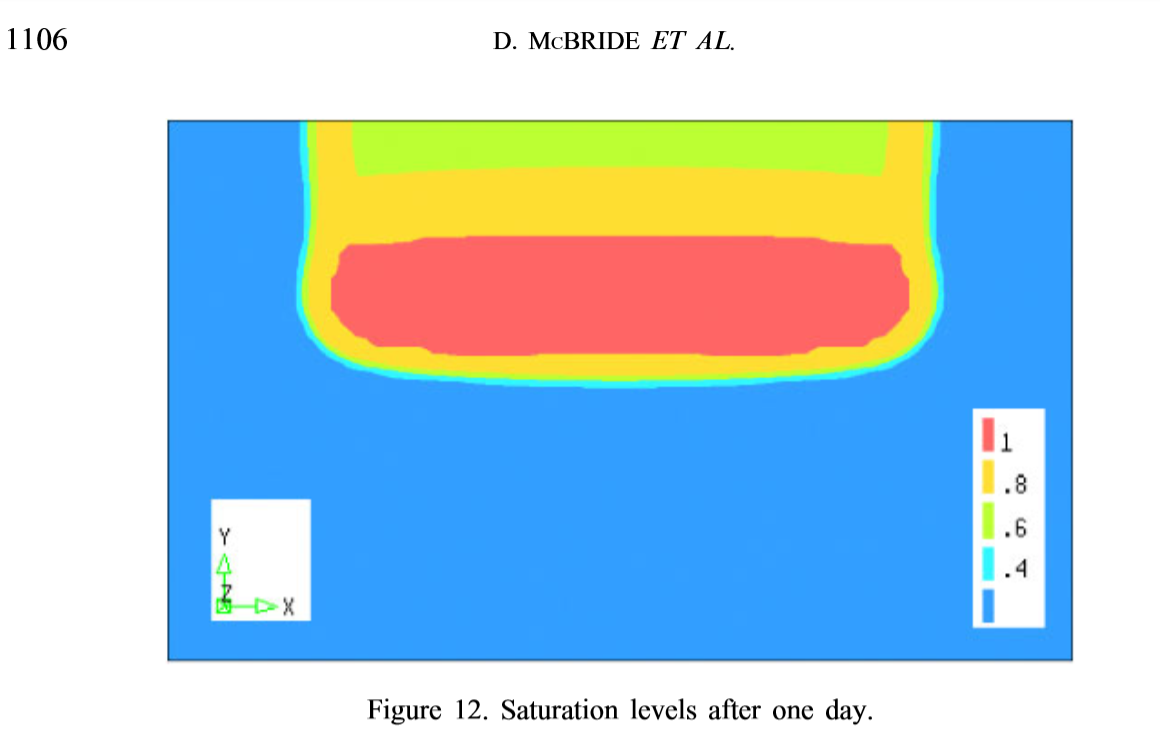

In [137]:
from IPython.display import Image
Image(filename='McBride2016.png')

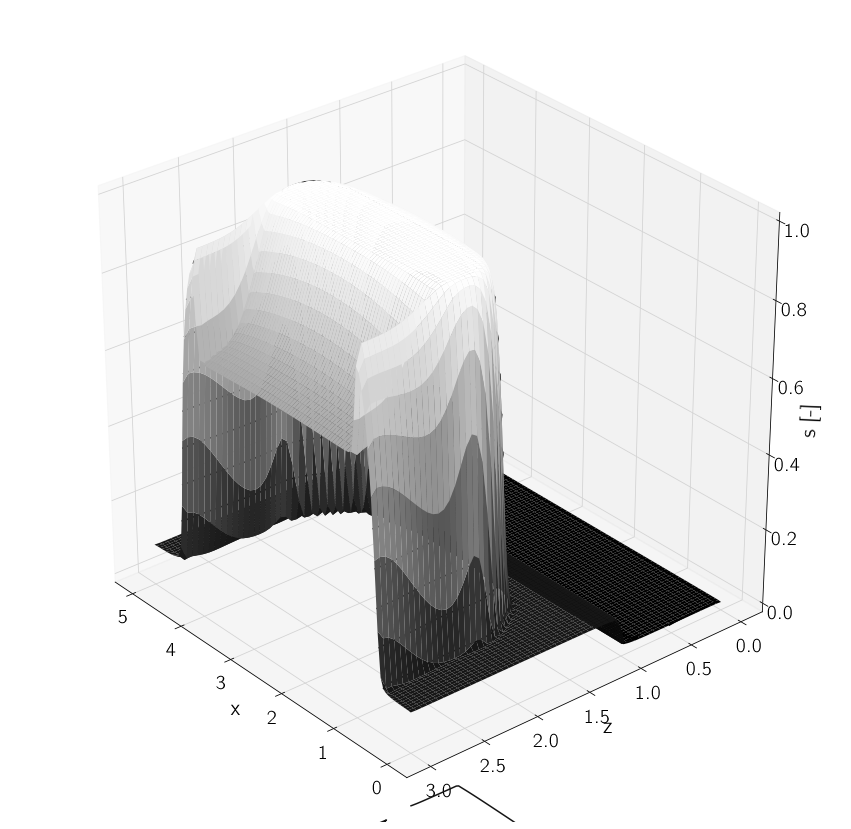

In [126]:
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
#%matplotlib notebook
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection="3d")
X, Y = np.mgrid[-1:1:30j, -1:1:30j]
Z = np.sin(np.pi*X)*np.sin(np.pi*Y)
ax.plot_surface(X_g, Y_g, z_dense_smooth_rbf, cmap="gray", lw=1, rstride=1, cstride=1)
ax.contour(X_g, Y_g, z_dense_smooth_rbf, 10, lw=3, cmap="gray", linestyles="solid", offset=-1)
ax.contour(X_g, Y_g, z_dense_smooth_rbf, 10, lw=3, colors="k", linestyles="solid")
ax.set_xlabel('x',fontsize=22)
ax.set_ylabel('z',fontsize=22)
ax.set_zlabel('s [-]',fontsize=22)

# view_init(elev=None, azim=None)
ax.view_init(30, 140)

plt.show()
